# MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl  
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from other import tools

In [4]:
df_rating=pd.read_csv('data/sentiment_1_0.csv')

In [5]:
df_rating.head()

,full_text,sentiment
0,@camipaisa1 @Marbelle30 Soy antioqueño de nac...,0
1,@AlejaLoC Medellin lastimosamente a vivido en ...,0
2,Señora acomplejada nosotros los paisas no la ...,0
3,@cocoa_nini @diamaov La cultura traqueta de M...,0
4,@PinoCalad Los efectos de la cultura traqueta ...,0


In [6]:
# clean the tweet and save it on a new column

def clean_tweet(tweet):

  new_tweet = ''
  words = tweet.split()
  for w in words:
    wl = w.lower() # word in lower case
    
    # replace numbers
    for number, new_value in tools.replace_numbers_dict.items():
      wl = str(wl).replace(number,new_value)

    # replace some punctuations mark to keep only words
    for punctuation, new_value in tools.replace_punctuation_dict.items():
      wl = wl.replace(punctuation,new_value)
    
    # replace accent mark 
    for accent, new_value in tools.replace_accent_dict.items():
      wl = wl.replace(accent,new_value)

    if wl not in tools.model_stop_wprds:
      new_tweet += f'{wl} '
  
  return new_tweet[:-1]

In [7]:
df_rating['tweet'] = df_rating['full_text'].apply(clean_tweet)

In [8]:
df_rating.head(10)

,full_text,sentiment,tweet
0,@camipaisa1 @Marbelle30 Soy antioqueño de nac...,0,camipaisa marbelle antioqueño nacimiento verda...
1,@AlejaLoC Medellin lastimosamente a vivido en ...,0,alejaloc medellin lastimosamente vivido cultur...
2,Señora acomplejada nosotros los paisas no la ...,0,señora acomplejada nosotros paisas queremos me...
3,@cocoa_nini @diamaov La cultura traqueta de M...,0,cocoanini diamaov cultura traqueta medellin se...
4,@PinoCalad Los efectos de la cultura traqueta ...,0,pinocalad efectos cultura traqueta dejo escoba...
5,@karinin7986 Soy de Medellín y la cultura pais...,0,karinin medellin cultura paisa asco verguenza
6,Para nadie es un secreto que la sociedad Pais...,0,nadie secreto sociedad paisa medellin valle ab...
7,Esa cultura traqueta que carcome a medellín y ...,0,cultura traqueta carcome medellin aun sigue vi...
8,"cansadita de la gente de Medellín, y la cultu...",0,cansadita gente medellin cultura paisa
9,@nocontextSebs En Medellín no están lejos de p...,0,nocontextsebs medellin lejos pensar superiorid...


In [9]:
# make a copy of the data
df_ml = df_rating.copy()

In [10]:
# split the data into train and test data
tweets_train, tweets_test = train_test_split(df_rating, test_size=0.2, random_state=0)

In [11]:
# creating the instance of CountVectorizer() to use it in the dataset
vectorizer = CountVectorizer()

In [12]:
x_train_bow = vectorizer.fit_transform(tweets_train['tweet'])
x_test_bow = vectorizer.transform(tweets_test['tweet'])

In [13]:
y_train_bow = tweets_train['sentiment']
y_test_bow = tweets_test['sentiment']

In [14]:
# percentage of positive and negative reviews
y_test_bow.value_counts() / y_test_bow.shape[0]

0    0.611465
1    0.388535
Name: sentiment, dtype: float64

In [15]:
# Training the model 
lr_model_all = LogisticRegression(C=1, solver="liblinear")
lr_model_all.fit(x_train_bow, y_train_bow)
# Predicting the output
test_pred_lr_prob = lr_model_all.predict_proba(x_test_bow)
test_pred_lr_all = lr_model_all.predict(x_test_bow)

In [16]:

print("F1 score: ", f1_score(y_test_bow, test_pred_lr_all))
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_lr_all) * 100)

F1 score:  0.6902654867256638
Accuracy:  77.70700636942675


In [17]:
probabilities = [each[1] for each in test_pred_lr_prob]

In [18]:
predictions = pd.DataFrame()
predictions['tweet'] = tweets_test['tweet']
predictions['sentiment'] = tweets_test['sentiment']
predictions['predicted_sentiment'] = test_pred_lr_all
predictions['Predicted_probability'] = probabilities

In [19]:
predictions.head(7)

,tweet,sentiment,predicted_sentiment,Predicted_probability
382,odinthorlocky ferchoeortiz alejarodc aceromora...,0,0,0.202292
487,excelente iniciativa destinan mil millones jo...,1,1,0.770041
351,candidato alcaldia medellin dice izquierda pet...,0,0,0.265062
14,revistasemana buen uribista tuvo secretario se...,0,0,0.159955
145,soñores noticiascaracol pregunta ejercito pued...,0,0,0.358176
422,video cuchillo mano joven enfrento policia met...,0,0,0.079145
753,luismorales caos transmilenio orden diciplina ...,1,1,0.622490


In [20]:
accuracy_score(predictions['sentiment'], predictions['predicted_sentiment'])

0.7770700636942676

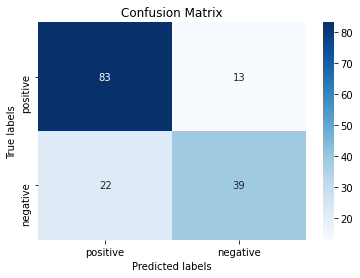

In [21]:
# define the consufion matrix
c_m = confusion_matrix(predictions["sentiment"], predictions["predicted_sentiment"])
# plot a heat map with seaborn
ax= plt.subplot()
list_color=['#33D1FF','#5BC0BE','#CCC9DC','#6FFFE9']
sns.heatmap(c_m, annot=True, fmt='g', ax=ax, cmap = "Blues");  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['positive', 'negative']); ax.yaxis.set_ticklabels(['positive','negative']);

In [22]:
df_tweets = pd.read_csv('https://raw.githubusercontent.com/GDLPLearning/Sentiment-Analysis-for-the-MDP/master/notebooks/Exploratory/data/tweets_interim.csv')

In [23]:
df_tweets['predicted_sentiment'] = lr_model_all.predict(vectorizer.transform(df_tweets['full_text']))

In [24]:
df_tweets.head(10)

,Unnamed: 0,full_text,key_word,hour,day_of_week,month,year,predicted_sentiment
0,0,Me acordé que a los colombianos de mi ex trab...,trabajo,22,4,1,2020,1
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,trabajo,22,4,1,2020,1
2,2,En Tierragro sabemos que la labor en el campo...,trabajo,19,4,1,2020,1
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,trabajo,19,4,1,2020,1
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,trabajo,18,4,1,2020,0
5,5,En Medellin los taxistas trabajan bien aunque...,trabajo,18,4,1,2020,0
6,6,Buen trabajo el que ha hecho Miguel Ángel Her...,trabajo,17,4,1,2020,1
7,7,"Parce no, yo trabajo en Sabaneta y a veces sa...",trabajo,17,4,1,2020,1
8,8,"Con apoyo de @GPALegal, Caja de Compensación ...",trabajo,17,4,1,2020,1
9,9,@LeonAlexis724 @camiloe98 Desempleo? No lo he...,trabajo,16,4,1,2020,1


In [25]:
df_tweets['predicted_sentiment'].value_counts()

1    146741
0     97761
Name: predicted_sentiment, dtype: int64

In [26]:
df_tweets.replace({'predicted_sentiment': {0: 'negative', 1: 'positive'}}, inplace=True)

In [27]:
df_tweets.head(10)

,Unnamed: 0,full_text,key_word,hour,day_of_week,month,year,predicted_sentiment
0,0,Me acordé que a los colombianos de mi ex trab...,trabajo,22,4,1,2020,positive
1,1,@JoseFBarriosG @VLADDO @Uber Como van a apoya...,trabajo,22,4,1,2020,positive
2,2,En Tierragro sabemos que la labor en el campo...,trabajo,19,4,1,2020,positive
3,3,@seguridadmed PARA NADIE ES UN SECRETO GENERA...,trabajo,19,4,1,2020,positive
4,4,@kmilohurtado_81 @SaqueLargoWin Tengo casi un...,trabajo,18,4,1,2020,negative
5,5,En Medellin los taxistas trabajan bien aunque...,trabajo,18,4,1,2020,negative
6,6,Buen trabajo el que ha hecho Miguel Ángel Her...,trabajo,17,4,1,2020,positive
7,7,"Parce no, yo trabajo en Sabaneta y a veces sa...",trabajo,17,4,1,2020,positive
8,8,"Con apoyo de @GPALegal, Caja de Compensación ...",trabajo,17,4,1,2020,positive
9,9,@LeonAlexis724 @camiloe98 Desempleo? No lo he...,trabajo,16,4,1,2020,positive


In [28]:
df_pos=df_tweets[df_tweets['predicted_sentiment']=='positive'].groupby(['key_word','year']).size().to_frame().rename(columns={0:'pos'}).reset_index()

In [29]:
df_neg=df_tweets[df_tweets['predicted_sentiment']=='negative'].groupby(['key_word','year']).size().to_frame().rename(columns={0:'neg'}).reset_index()

In [30]:
df_pos

,key_word,year,pos
0,cultura,2019,7474
1,cultura,2020,6460
2,cultura,2021,5088
3,cultura,2022,2179
4,empresa,2019,931
5,empresa,2020,1103
6,empresa,2021,882
7,empresa,2022,360
8,jovenes,2019,3992
9,jovenes,2020,2674


In [31]:
df_neg

,key_word,year,neg
0,cultura,2019,1550
1,cultura,2020,1689
2,cultura,2021,1057
3,cultura,2022,575
4,empresa,2019,2338
5,empresa,2020,4282
6,empresa,2021,3723
7,empresa,2022,1735
8,jovenes,2019,1543
9,jovenes,2020,1118


In [32]:
df_sent=pd.merge(df_pos,df_neg,on=['key_word','year'])

In [33]:
df_sent

,key_word,year,pos,neg
0,cultura,2019,7474,1550
1,cultura,2020,6460,1689
2,cultura,2021,5088,1057
3,cultura,2022,2179,575
4,empresa,2019,931,2338
5,empresa,2020,1103,4282
6,empresa,2021,882,3723
7,empresa,2022,360,1735
8,jovenes,2019,3992,1543
9,jovenes,2020,2674,1118


In [34]:
df_sent['freq_pos']=df_sent['pos']/(df_sent['pos']+df_sent['neg'])

In [35]:
df_sent

,key_word,year,pos,neg,freq_pos
0,cultura,2019,7474,1550,0.828236
1,cultura,2020,6460,1689,0.792735
2,cultura,2021,5088,1057,0.827990
3,cultura,2022,2179,575,0.791213
4,empresa,2019,931,2338,0.284797
5,empresa,2020,1103,4282,0.204828
6,empresa,2021,882,3723,0.191531
7,empresa,2022,360,1735,0.171838
8,jovenes,2019,3992,1543,0.721229
9,jovenes,2020,2674,1118,0.705169


In [43]:
px.line(df_sent, x='year', y='freq_pos', color='key_word', title='Frequency of Positive Tweets',width=600)